# **MPA-MLF Miniproject**
# Classification of wireless transmiters
### Daniel Havránek

In [37]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.datasets import cifar10
from keras.utils import to_categorical

x_validation = pd.read_csv('drive/MyDrive/Colab Notebooks/x_test.csv')
x_in = pd.read_csv('drive/MyDrive/Colab Notebooks/x_train.csv')
y_in = pd.read_csv('drive/MyDrive/Colab Notebooks/y_train.csv')

x_train, x_test, y_train, y_test = train_test_split(x_in, y_in, test_size = 0.2)
x_train = x_train.drop("Unnamed: 0", axis=1)
x_train = x_train.drop("m_power", axis=1)
x_train = x_train.drop("Tosc", axis=1)
x_train = x_train.drop("Tmix", axis=1)
x_test = x_test.drop("Unnamed: 0", axis=1)
x_test = x_test.drop("m_power", axis=1)
x_test = x_test.drop("Tosc", axis=1)
x_test = x_test.drop("Tmix", axis=1)
y_train = y_train.drop("id", axis=1)
y_test = y_test.drop("id", axis=1)

x_val = x_validation.drop("Unnamed: 0", axis=1)
x_val = x_val.drop("m_power", axis=1)
x_val = x_val.drop("Tosc", axis=1)
x_val = x_val.drop("Tmix", axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
#labels = {0:'zero',1:'one',2:'two',3:'three',4:'four',5:'five',6:'six',7:'seven'}
n_classes = 8

x_train_scaled = x_train + abs(x_train.min())
x_train_scaled = x_train_scaled / x_train_scaled.max()

y_train_0 = y_train - 1
y_train_encoded = to_categorical(y_train_0.to_numpy().reshape(-1,1), num_classes=n_classes)

x_test_scaled = x_test + abs(x_test.min())
x_test_scaled = x_test_scaled / x_test_scaled.max()

y_test_0 = y_test - 1
y_test_encoded = to_categorical(y_test_0.to_numpy().reshape(-1,1), num_classes=n_classes)

In [39]:
model = Sequential()
model.add(Dense(64, input_dim=8, activation='sigmoid'))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                576       
                                                                 
 dense_5 (Dense)             (None, 8)                 520       
                                                                 
Total params: 1,096
Trainable params: 1,096
Non-trainable params: 0
_________________________________________________________________


In [40]:
optimizer = SGD(learning_rate = 0.1)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(x_train_scaled, y_train_encoded, epochs=30, batch_size=64, validation_split = 0.2, verbose=1)

Epoch 1/30
154/154 [==============================] - 1s 6ms/step - loss: 2.0149 - accuracy: 0.2661 - val_loss: 1.9438 - val_accuracy: 0.2518
Epoch 2/30
154/154 [==============================] - 1s 4ms/step - loss: 1.8585 - accuracy: 0.3913 - val_loss: 1.7558 - val_accuracy: 0.3832
Epoch 3/30
154/154 [==============================] - 1s 5ms/step - loss: 1.6668 - accuracy: 0.4989 - val_loss: 1.5677 - val_accuracy: 0.5037
Epoch 4/30
154/154 [==============================] - 1s 4ms/step - loss: 1.5015 - accuracy: 0.6157 - val_loss: 1.4211 - val_accuracy: 0.6147
Epoch 5/30
154/154 [==============================] - 0s 3ms/step - loss: 1.3659 - accuracy: 0.6988 - val_loss: 1.2905 - val_accuracy: 0.7095
Epoch 6/30
154/154 [==============================] - 0s 3ms/step - loss: 1.2414 - accuracy: 0.7626 - val_loss: 1.1820 - val_accuracy: 0.6778
Epoch 7/30
154/154 [==============================] - 1s 3ms/step - loss: 1.1209 - accuracy: 0.8018 - val_loss: 1.0541 - val_accuracy: 0.9276
Epoch 

In [41]:
score = model.evaluate(x_test_scaled, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 0.4119280278682709
Test accuracy: 83.3984375 %


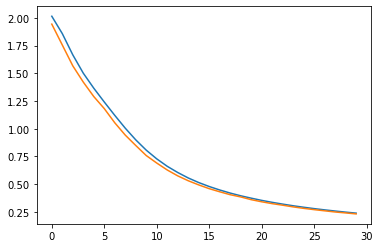

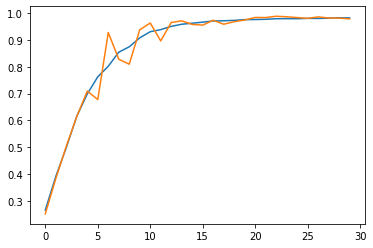

In [42]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [44]:
prediction = model.predict([x_val])
print(prediction.shape)

index = np.argmax(prediction, axis=1)
res = index + 1
result = pd.DataFrame({'id': np.arange(0, len(res)), 'target': res})

result = result.drop("id", axis=1)

from google.colab import files
result.to_csv('result.csv') 
files.download('result.csv')

120/120 [==============================] - 0s 2ms/step
(3840, 8)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
result

,target
0,2
1,5
2,5
3,6
4,8
...,...
3067,7
3068,2
3069,5
3070,5
